In [1]:
# reg : 파이썬에서 브라우저의 역할을 대신해줌
import requests as req

In [3]:
# 1. req를 통해서 네이버 페이비 정보를 요청
# .get('URL(정보를 가져 오라고 명령할 페이지 주소)')
res = req.get("http://www.naver.com")

In [3]:
# 2. reponse : 응답코드를 넘겨받음
# < Response [200]>
# 200~ 300~ : 통신성공
# 400~ : 사용자(클라이언트 , 요청) 문제
# 500~ : 서버 문제

In [4]:
# res에서 글자만 꺼내오기
res.text

'   <!doctype html> <html lang="ko" class="fzoom"> <head> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" 

# 멜론 사이트 요청하기

In [10]:
head = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'}
req.get("https://www.melon.com", headers = head)
# <Response [406]>
# : 멜론 서버에서 들어온 요청이 브라우저가 아닌 컴퓨터임을 인지해서 막아버림


<Response [200]>

### 뉴스타이틀 수집

In [13]:
# (1) 네이버 사이트(검색한 뉴스 화면)를 요청
res = req.get('https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EC%98%A4%EC%97%BC%EC%88%98+%EB%B0%A9%EB%A5%98')
res.text

'<!doctype html> <html lang="ko"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="오염수 방류 : 네이버 뉴스검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'오염수 방류\'의 네이버 뉴스검색 결과입니다."> <meta name="description" lang="ko" content="\'오염수 방류\'의 네이버 뉴스검색 결과입니다."> <title>오염수 방류 : 네이버 뉴스검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link rel="stylesheet" type="text/css" href="https://s

## BeautifulSoup
- req를 통해서 받아온 텍스트 데이터를 컴퓨터가 이해할 수 있는 html형태로 변환

In [14]:
# 주의할 점, stoneSoup이 아닌 일반Soup을 임포트!
from bs4 import BeautifulSoup as bs

In [16]:
# (2) 응답을 받은 데이터에서 뉴스 타이틀만 수집
# bs(변형할 데이터 , 변형할 방법)
# 텍스트형태(문자열) -> html코드(컴퓨터 언어로)
soup = bs(res.text , "lxml")
soup

<!DOCTYPE html>
<html lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="오염수 방류 : 네이버 뉴스검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'오염수 방류'의 네이버 뉴스검색 결과입니다." property="og:description"/> <meta content="'오염수 방류'의 네이버 뉴스검색 결과입니다." lang="ko" name="description"/> <title>오염수 방류 : 네이버 뉴스검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link href="https://ssl.pstatic.net/sstatic/search/pc/

In [ ]:
# 원하는 부분 태그 검색하는 방법
# 해당 부분 마우스 우클릭 -> 검색 : 그 부분의 html 태그가 개발자 도구창에 뜸

In [19]:
# select("선택자") : html데이터에서 특정 요소만 수집

# soup.select("a")
# a태그만 수집 : 뉴스 타이틀이 a태그!
# 모든 a 태그 중에 내가 필요한 뉴스 타이틀인 a태그만 가져오고 싶음
# -> 구분자(id(#), class(.) 등)를 명시!
# 선택자에서 띄어쓰기는 자손을 의미
title = soup.select("a.news_tit" )
title
# id는 한 페이지에 하나만 , class는 페이지 내에서 똑같은 이름으로 중복가능

[<a class="news_tit" href="https://www.yna.co.kr/view/AKR20230823144800073?input=1195m" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=1&amp;i=880000D8_000000000000000014148457&amp;g=001.0014148457&amp;u='+urlencode(this.href));" target="_blank" title="후쿠시마 오염수 오늘 방류 개시…일본언론 '오후 1시' 예상">후쿠시마 <mark>오염수</mark> 오늘 <mark>방류</mark> 개시…일본언론 '오후 1시' 예상</a>,
 <a class="news_tit" href="https://imnews.imbc.com/replay/2023/nwtoday/article/6517471_36207.html" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=6&amp;i=88000119_000000000000000001295136&amp;g=214.0001295136&amp;u='+urlencode(this.href));" target="_blank" title="오후 1시쯤 오염수 방류 시작‥이시각 후쿠시마">오후 1시쯤 <mark>오염수 방류</mark> 시작‥이시각 후쿠시마</a>,
 <a class="news_tit" href="https://news.kbs.co.kr/news/view.do?ncd=7755293&amp;ref=A" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=11&amp;i=88000114_000000000000000011551167&amp;g=056.0011551167&amp;u='+urlencode(this.href));" target="_blank" title="“일본 후쿠시마 오염수 방류, 내일 오후 1시 시작 조율중”">“일본 후쿠시마 <mar

In [23]:
# 내가 수집한 데이터 중에 뉴스 타이틀 문자열만 가져오기
# 수집된 요소 중에 컨텐츠(텍스트) 데이터만 추출

title[2].text

'“일본 후쿠시마 오염수 방류, 내일 오후 1시 시작 조율중”'

In [24]:
for i in title :
    print(i.text)

후쿠시마 오염수 오늘 방류 개시…일본언론 '오후 1시' 예상
오후 1시쯤 오염수 방류 시작‥이시각 후쿠시마
“일본 후쿠시마 오염수 방류, 내일 오후 1시 시작 조율중”
주일美대사, 日오염수 방류계획에 "지지"…31일 후쿠시마 방문
日 오염수 내일부터 방류…서울시 "모든 수산물 매일 표본조사"
[속보] 日언론 “오염수 70%는 방류 기준 미달”
식약처 "후쿠시마 오염수 방류 관계없이 日 식품 수입규제 유지"
김동연 "日 오염수 방류, 정부는 방조 넘어 공조…철회하라"
이재명 “日오염수 방류는 제2의 태평양 전쟁”
한총리 "日오염수 방류, 기준에 안 맞으면 국제 제소"


# 네이버 금융정보수집

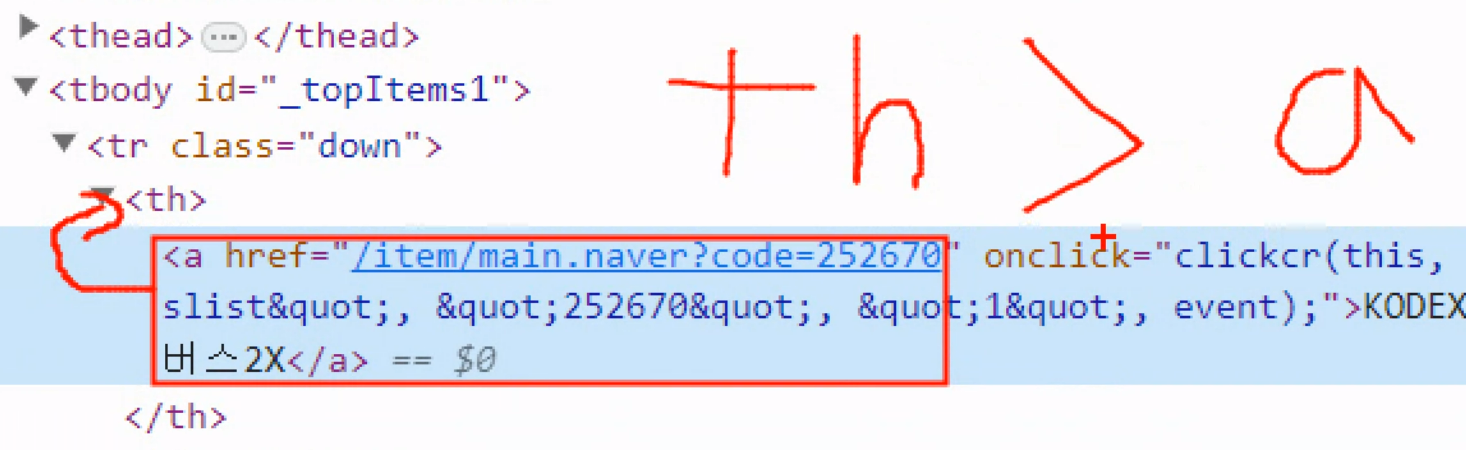
- 계층 선택자(내가 가져오고 싶은 태그에 구분자가 부여되어 있지 않음)
 : 구분자가 있는 부모 기준으로 내려와서 선택자 지정
th : 부모 선택자 -> a : 자식 선택자 


      선택자 쉽게 가져오는 방법
        - 개발자 도구에서 요소 우클릭 -> copy -> copy selector
        - 주의점! 반드시 내가 선택한 요소 하나의 선택자만 가져옴
        - 복수개가 필요한 경우에는 선택자를 수정( ex) nth-child() )

In [26]:
# (1) req를 통해서 url정보를 요청
# (2) 응답데이터가 올바르다면 bs을 통해서 데이터 변환
# (3) 변형된 데이터에서 필요한 태그만 수집
# !! 부모자식을 의미하는 자식선택자를 잘 활용
# 수집하고자 하는 요소가 아이다, 클래스 구분자가 없다면 반드시 부모를 검사
# 부모태그가 구분자가 존재할 때까지 검사를 진행
# 구분자가 없는 경우에는 정확하지 않을 확률이 높음
res = req.get("https://finance.naver.com")

In [27]:
res.text

'<html lang="ko">\n <head> \n  <title>네이버 증권</title> \n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" /> \n  <meta http-equiv="Content-Script-Type" content="text/javascript" /> \n  <meta http-equiv="Content-Style-Type" content="text/css" /> \n  <meta name="apple-mobile-web-app-title" content="네이버 증권" /> \n  <meta property="og:title" content="네이버 증권" /> \n  <meta property="og:image" content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" /> \n  <meta property="og:url" content="https://finance.naver.com" /> \n  <meta property="og:description" content="국내 해외 증시 지수, 시장지표, 뉴스, 증권사 리서치 등 제공" /> \n  <meta property="og:type" content="article" /> \n  <meta property="og:article:thumbnailUrl" content="" /> \n  <meta property="og:article:author" content="네이버 증권" /> \n  <meta property="og:article:author:url" content="http://FINANCE.NAVER.COM" /> \n  <link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230808201105/css/f

In [30]:
soup = bs(res.text ,'lxml')
soup

<html lang="ko">
<head>
<title>네이버 증권</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="네이버 증권" name="apple-mobile-web-app-title"/>
<meta content="네이버 증권" property="og:title"/>
<meta content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" property="og:image"/>
<meta content="https://finance.naver.com" property="og:url"/>
<meta content="국내 해외 증시 지수, 시장지표, 뉴스, 증권사 리서치 등 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="" property="og:article:thumbnailUrl"/>
<meta content="네이버 증권" property="og:article:author"/>
<meta content="http://FINANCE.NAVER.COM" property="og:article:author:url"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20230808201105/css/finance_header.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/stati

In [40]:
# "#_topItems1 > tr:nth-child(1) > th > a" : 첫번째 것만 가리킴
# => 순서를 가리키는 nth-child(1)를 지워주면 다 가져옴

data = soup.select("#_topItems1 > tr > th > a" )
data

[<a href="/item/main.naver?code=252670" onclick="clickcr(this, 'spe.slist', '252670', '1', event);">KODEX 200선물인버스2X</a>,
 <a href="/item/main.naver?code=073640" onclick="clickcr(this, 'spe.slist', '073640', '2', event);">테라사이언스</a>,
 <a href="/item/main.naver?code=046970" onclick="clickcr(this, 'spe.slist', '046970', '3', event);">우리로</a>,
 <a href="/item/main.naver?code=251340" onclick="clickcr(this, 'spe.slist', '251340', '4', event);">KODEX 코스닥150선물인버스</a>,
 <a href="/item/main.naver?code=267320" onclick="clickcr(this, 'spe.slist', '267320', '5', event);">나인테크</a>,
 <a href="/item/main.naver?code=277410" onclick="clickcr(this, 'spe.slist', '277410', '6', event);">인산가</a>,
 <a href="/item/main.naver?code=203650" onclick="clickcr(this, 'spe.slist', '203650', '7', event);">드림시큐리티</a>,
 <a href="/item/main.naver?code=041020" onclick="clickcr(this, 'spe.slist', '041020', '8', event);">폴라리스오피스</a>,
 <a href="/item/main.naver?code=214680" onclick="clickcr(this, 'spe.slist', '214680', '9',

In [39]:
for i in data:
    print(i.text)

KODEX 200선물인버스2X
테라사이언스
우리로
KODEX 코스닥150선물인버스
나인테크
인산가
드림시큐리티
폴라리스오피스
디알텍
시노펙스
KODEX 레버리지
MDS테크
태양금속
시큐레터
스마트레이더시스템
